In [108]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [110]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [112]:
df.duplicated().sum()

0

In [113]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [114]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [115]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
df = df.astype(int)



In [116]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [117]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [119]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [120]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198 (792.00 B)

 Trainable params: 198 (792.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [123]:
gray = model.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6496 - loss: 0.6324 - val_accuracy: 0.8138 - val_loss: 0.4763
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7992 - loss: 0.4829 - val_accuracy: 0.8181 - val_loss: 0.4325
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7986 - loss: 0.4597 - val_accuracy: 0.8175 - val_loss: 0.4156
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7987 - loss: 0.4433 - val_accuracy: 0.8206 - val_loss: 0.4079
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8106 - loss: 0.4228 - val_accuracy: 0.8250 - val_loss: 0.4039
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.4224 - val_accuracy: 0.8244 - val_loss: 0.4013
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.4141 - val_accuracy: 0.8275 - val_loss: 0.3982
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4123 - val_accuracy: 0.

In [124]:
import matplotlib.pyplot as plt

In [125]:
history= gray

In [126]:
y_log=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [127]:
history.history

{'accuracy': [0.7251562476158142,
  0.7989062666893005,
  0.8037499785423279,
  0.8075000047683716,
  0.8115624785423279,
  0.813281238079071,
  0.8121874928474426,
  0.8157812356948853,
  0.8196874856948853,
  0.8245312571525574,
  0.8268749713897705,
  0.8309375047683716,
  0.8357812762260437,
  0.8346874713897705,
  0.8382812738418579],
 'loss': [0.5758238434791565,
  0.4776250422000885,
  0.44781339168548584,
  0.434806227684021,
  0.42758429050445557,
  0.4229963421821594,
  0.41971883177757263,
  0.41625556349754333,
  0.41341519355773926,
  0.4105498194694519,
  0.4076753258705139,
  0.4057529866695404,
  0.40259674191474915,
  0.40064603090286255,
  0.39728012681007385],
 'val_accuracy': [0.8137500286102295,
  0.8181250095367432,
  0.8174999952316284,
  0.8206250071525574,
  0.824999988079071,
  0.8243749737739563,
  0.8274999856948853,
  0.8299999833106995,
  0.8287500143051147,
  0.8331249952316284,
  0.8393750190734863,
  0.840624988079071,
  0.8462499976158142,
  0.84375,
 

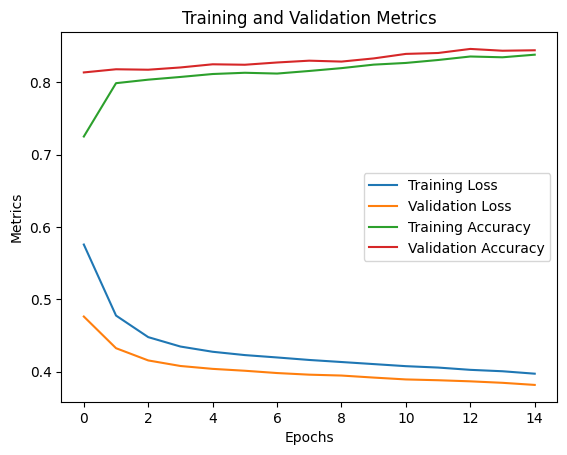

In [128]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(gray.history['val_loss'], label='Validation Loss')

# Plot training accuracy and validation accuracy
plt.plot(gray.history['accuracy'], label='Training Accuracy')
plt.plot(gray.history['val_accuracy'], label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [129]:
y_prep = np.where(y_log>0.5,1,0)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prep)

0.8415